In [42]:
import math

In [43]:
# 離散化モデルでの式
def f1(h, e_n, i_n1, i_n):
    return (2/h)*(i_n1-i_n)-e_n

def f2(h, v_n, i_n1, i_n):
    return (h/2)*(i_n1+i_n)+v_n

def f3(h,e_n,v_n,i_n):
    return ((2*h)/(4+0.4*h+h**2))*(1+e_n-v_n)+((4-h**2)/(4+0.4*h+h**2))*i_n


import matplotlib.pyplot as plt

def gauss_jacobi(h, e_n, v_n, i_n):
    time = []
    current = []
    voltage = []
    for i in range(1000):

        i_n1 = f3(h, e_n, v_n, i_n)
        e_n1 = f1(h, e_n, i_n1, i_n)
        v_n1 = f2(h, v_n, i_n1, i_n)
        
        i_n = i_n1     # 新しい値の代入
        e_n = e_n1     # 新しい値の代入
        v_n = v_n1     # 新しい値の代入

        time.append(h*i)
        current.append(i_n)
        voltage.append(v_n)
    return time, current, voltage
        # print(i,"回目 : ", 'i_n: {:.4f}'.format(i_n),' e_n: {:.4f}'.format(e_n),' v_n: {:.4f}'.format(v_n))


In [44]:
#　厳密解の式
def i(t):
    return (1/math.sqrt(0.99))*math.exp(-0.1*t)*math.sin(math.sqrt(0.99)*t)
def v(t):
    return 1-(0.1/math.sqrt(0.99))*math.exp(-0.1*t)*math.sin(math.sqrt(0.99)*t)-math.exp(-0.1*t)*math.cos(math.sqrt(0.99)*t)

In [45]:
import matplotlib.pyplot as plt

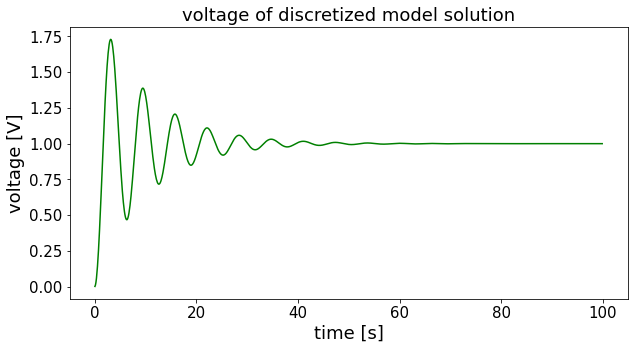

In [46]:
x, y ,z = gauss_jacobi(0.1, 0,0,0)

plt.figure(figsize=(10,5))
plt.tick_params(labelsize=15)
plt.title('voltage of discretized model solution',fontsize=18)
plt.xlabel("time [s]",fontsize=18)
plt.ylabel("voltage [V]",fontsize=18)
# 緑色のサインカーブを描く
plt.plot(x, z, color = "green")

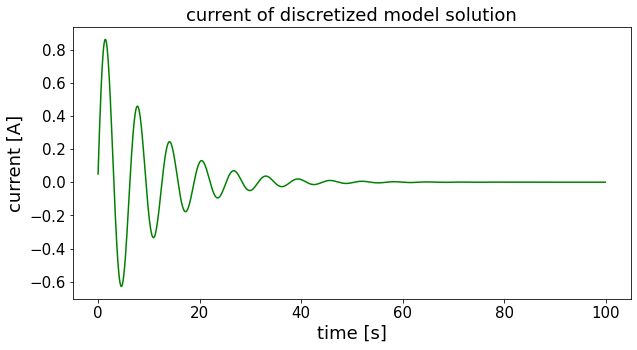

In [47]:
x, y ,z = gauss_jacobi(0.1, 0,0,0)

plt.figure(figsize=(10,5))
plt.tick_params(labelsize=15)
plt.title('current of discretized model solution',fontsize=18)
plt.xlabel("time [s]",fontsize=18)
plt.ylabel("current [A]",fontsize=18)
# 緑色のサインカーブを描く
plt.plot(x, y, color = "green")

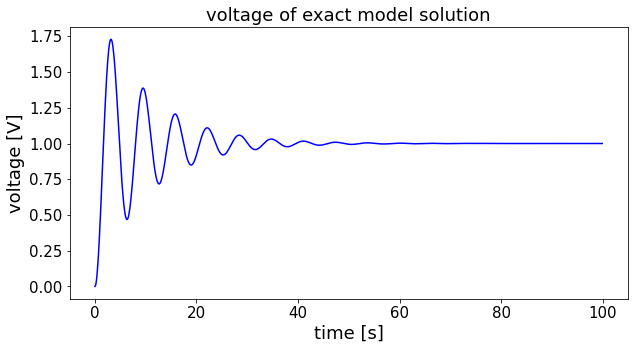

In [48]:
x = [t/10 for t in range(1000)]
y = []
for t in range(1000):
    y.append(v(t/10))

plt.figure(figsize=(10,5))
plt.tick_params(labelsize=15)
plt.title('voltage of exact solution',fontsize=18)
plt.xlabel("time [s]",fontsize=18)
plt.ylabel("voltage [V]",fontsize=18)
# 緑色のサインカーブを描く
plt.plot(x, y, color = "blue")

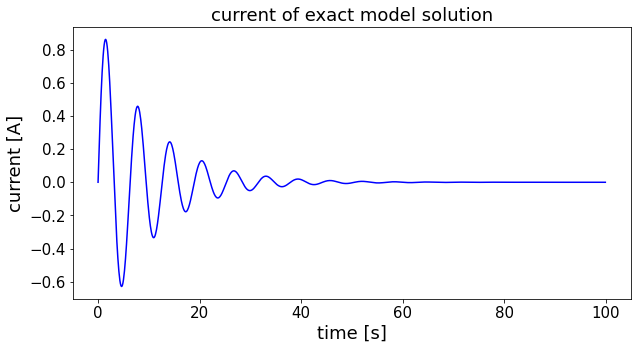

In [49]:
x = [t/10 for t in range(1000)]
y = []
for t in range(1000):
    y.append(i(t/10))

plt.figure(figsize=(10,5))
plt.tick_params(labelsize=15)
plt.title('current of exact solution',fontsize=18)
plt.xlabel("time [s]",fontsize=18)
plt.ylabel("current [A]",fontsize=18)
# 緑色のサインカーブを描く
plt.plot(x, y, color = "blue")